reference = https://www.kaggle.com/code/saideepakdepally/ids-using-cnn-lstm/notebook#Training-the-model 

In [953]:
import pandas as pd
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [954]:
dfs = []
for i in range(1,3):
    path = "archive/UNSW_NB15_{}.parquet".format(i)
    dfs.append(pd.read_parquet(path))
combined_data = pd.concat(dfs).reset_index(drop=True)  # Concat all to a single df

In [955]:
combined_data.head(10)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.093750,1.803636e+08,...,0,0,1,1,0,0,0,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.000000,8.810000e+08,...,0,0,1,1,0,0,0,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.000000,8.544000e+08,...,0,0,1,1,0,0,0,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.656250,6.000000e+08,...,0,0,2,1,0,0,0,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.000000,8.504000e+08,...,0,0,2,1,0,0,0,0,Normal,0
5,0.000003,udp,-,INT,2,0,784,0,333333.312500,1.045333e+09,...,0,0,2,1,0,0,0,0,Normal,0
6,0.000006,udp,-,INT,2,0,1960,0,166666.656250,1.306667e+09,...,0,0,2,1,0,0,0,0,Normal,0
7,0.000028,udp,-,INT,2,0,1384,0,35714.285156,1.977143e+08,...,0,0,1,1,0,0,0,0,Normal,0
8,0.000000,arp,-,INT,1,0,46,0,0.000000,0.000000e+00,...,0,0,2,2,0,0,0,1,Normal,0
9,0.000000,arp,-,INT,1,0,46,0,0.000000,0.000000e+00,...,0,0,2,2,0,0,0,1,Normal,0


In [956]:
print(combined_data.columns)

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt',
       'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt',
       'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_sm_ips_ports',
       'attack_cat', 'label'],
      dtype='object')


In [957]:
combined_data['attack_cat'].value_counts()

attack_cat
Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: count, dtype: int64

In [958]:
combined_data['service'].value_counts()

service
-           141321
dns          68661
http         27011
smtp          6909
ftp-data      5391
ftp           4980
pop3          1528
ssh           1506
dhcp           120
snmp           109
ssl             86
irc             30
radius          21
Name: count, dtype: int64

In [959]:
combined_data['service'] = combined_data['service'].apply(lambda x:"None" if x=='-' else x)

In [960]:
combined_data['service'].value_counts()

service
None        141321
dns          68661
http         27011
smtp          6909
ftp-data      5391
ftp           4980
pop3          1528
ssh           1506
dhcp           120
snmp           109
ssl             86
irc             30
radius          21
Name: count, dtype: int64

In [961]:
combined_data.shape

(257673, 36)

In [962]:
combined_data.drop(columns=['label'],inplace=True) #I want prediction of the attack type not generic of whether it's an attack or not

In [963]:
train, test = train_test_split(combined_data,test_size=0.2,random_state=16)
train, val = train_test_split(train,test_size=0.2,random_state=16)

In [964]:
x_train, y_train = train.drop(columns=['attack_cat']), train[['attack_cat']]
x_test, y_test = test.drop(columns=['attack_cat']), test[['attack_cat']]
x_val, y_val = val.drop(columns=['attack_cat']), val[['attack_cat']]

In [965]:
x_train, y_train = train.drop(columns=['attack_cat']), train[['attack_cat']]
x_test, y_test = test.drop(columns=['attack_cat']), test[['attack_cat']]
x_val, y_val = val.drop(columns=['attack_cat']), val[['attack_cat']]

x_train.shape, y_train.shape

((164910, 34), (164910, 1))

In [966]:
x_test.shape, y_test.shape

((51535, 34), (51535, 1))

In [967]:
x_val.shape, y_val.shape

((41228, 34), (41228, 1))

In [968]:
y_train['attack_cat'].value_counts()

attack_cat
Normal            59731
Generic           37543
Exploits          28497
Fuzzers           15548
DoS               10429
Reconnaissance     8954
Analysis           1694
Backdoor           1433
Shellcode           961
Worms               120
Name: count, dtype: int64

In [969]:
y_val['attack_cat'].value_counts()

attack_cat
Normal            14750
Generic            9467
Exploits           7156
Fuzzers            3861
DoS                2674
Reconnaissance     2258
Analysis            419
Backdoor            385
Shellcode           237
Worms                21
Name: count, dtype: int64

In [970]:
y_test['attack_cat'].value_counts()

attack_cat
Normal            18519
Generic           11861
Exploits           8872
Fuzzers            4837
DoS                3250
Reconnaissance     2775
Analysis            564
Backdoor            511
Shellcode           313
Worms                33
Name: count, dtype: int64

In [971]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   dur                257673 non-null  float32 
 1   proto              257673 non-null  object  
 2   service            257673 non-null  category
 3   state              257673 non-null  object  
 4   spkts              257673 non-null  int16   
 5   dpkts              257673 non-null  int16   
 6   sbytes             257673 non-null  int32   
 7   dbytes             257673 non-null  int32   
 8   rate               257673 non-null  float32 
 9   sload              257673 non-null  float32 
 10  dload              257673 non-null  float32 
 11  sloss              257673 non-null  int16   
 12  dloss              257673 non-null  int16   
 13  sinpkt             257673 non-null  float32 
 14  dinpkt             257673 non-null  float32 
 15  sjit               257673 non-null

In [972]:
cat_col = ['proto', 'service', 'state']
num_col = list(set(x_train.columns) - set(cat_col))

In [973]:
print(train[cat_col].dtypes)

proto        object
service    category
state        object
dtype: object


In [974]:
print(train[num_col].dtypes)

ct_src_dport_ltm        int8
smean                  int16
is_ftp_login            int8
ct_ftp_cmd              int8
dloss                  int16
sloss                  int16
djit                 float32
sload                float32
sbytes                 int32
synack               float32
trans_depth            int16
dur                  float32
ct_flw_http_mthd        int8
dtcpb                  int64
is_sm_ips_ports         int8
dinpkt               float32
dmean                  int16
swin                   int16
response_body_len      int32
dload                float32
ackdat               float32
rate                 float32
spkts                  int16
dpkts                  int16
sjit                 float32
dwin                   int16
dbytes                 int32
ct_dst_sport_ltm        int8
stcpb                  int64
sinpkt               float32
tcprtt               float32
dtype: object


In [975]:
print(set(x_val['state'].unique()) - set(x_train['state'].unique()))
print(set(x_test['state'].unique()) - set(x_train['state'].unique()))


{'no', 'URN'}
set()


In [976]:
x_val = x_val[~x_val['state'].isin(['URN', 'no'])]  # Remove rows where 'state' is 'URN' or 'no'
y_val = y_val.loc[x_val.index]  # Ensure y_val matches the new x_val indices

In [977]:
print(x_train[cat_col].dtypes)

proto        object
service    category
state        object
dtype: object


In [978]:
print(x_val[cat_col].dtypes)

proto        object
service    category
state        object
dtype: object


In [979]:
print(x_test[cat_col].dtypes)

proto        object
service    category
state        object
dtype: object


In [980]:
x_train

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,smean,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports
12186,0.000009,udp,dns,INT,2,0,114,0,111111.109375,5.066666e+07,...,57,0,0,0,14,9,0,0,0,0
102830,0.036540,tcp,None,FIN,48,50,2958,33044,2654.625000,6.342638e+05,...,62,661,0,0,1,1,0,0,0,0
51398,0.000004,unas,None,INT,2,0,200,0,250000.000000,2.000000e+08,...,100,0,0,0,6,6,0,0,0,0
137238,0.772680,tcp,http,FIN,10,8,870,354,22.001347,8.106849e+03,...,87,44,1,0,1,1,0,0,1,0
68061,0.322975,tcp,None,FIN,10,6,502,268,46.443222,1.119591e+04,...,50,45,0,0,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46947,0.000011,unas,None,INT,2,0,200,0,90909.093750,7.272727e+07,...,100,0,0,0,4,4,0,0,0,0
112795,1.110855,tcp,http,FIN,14,18,1684,10168,27.906433,1.126340e+04,...,120,565,1,3924,1,1,0,0,1,0
78906,0.000001,udp,None,INT,2,0,104,0,1000000.000000,4.160000e+08,...,52,0,0,0,1,1,0,0,0,0
129663,1.186472,tcp,None,FIN,10,6,534,268,12.642523,3.243229e+03,...,53,45,0,0,1,1,0,0,0,0


In [981]:
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(sparse_output=False), cat_col),  # One-hot encode categorical features
        ('scaler', StandardScaler(), num_col)  # Standard scale numeric features
    ],
    remainder='passthrough'  # Keep other columns (if any) as is
)

In [982]:
x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)
x_val = ct.transform(x_val)

In [983]:
x_train

array([[ 0.        ,  0.        ,  0.        , ..., -0.73651854,
        -0.13254613, -0.49715063],
       [ 0.        ,  0.        ,  0.        , ..., -0.46521395,
        -0.13243686, -0.47637134],
       [ 0.        ,  0.        ,  0.        , ..., -0.73651854,
        -0.13254685, -0.49715063],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.73651854,
        -0.13254728, -0.49715063],
       [ 0.        ,  0.        ,  0.        , ...,  1.27045461,
        -0.11403041,  2.14723428],
       [ 0.        ,  0.        ,  0.        , ...,  0.81808177,
        -0.1278758 ,  0.07285858]])

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False), cat_col)], remainder='passthrough')
x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)
x_val = ct.transform(x_val)

In [985]:
y_train

,attack_cat
12186,Generic
102830,Normal
51398,DoS
137238,Reconnaissance
68061,Normal
...,...
46947,Exploits
112795,Normal
78906,Normal
129663,Normal


In [986]:
from imblearn.combine import SMOTETomek
from collections import Counter

smote_tomek = SMOTETomek(sampling_strategy={
    "Analysis": 3000, 
    "Backdoor": 3000,  
    "Shellcode": 2000,  
    "Worms": 1000  
}, random_state=42)

# Apply SMOTE-Tomek to the training data
x_train_resampled, y_train_resampled = smote_tomek.fit_resample(x_train, y_train)

# Check the new class distribution
print("Original class distribution:", y_train['attack_cat'].value_counts())
print()
print("Resampled class distribution:", y_train_resampled['attack_cat'].value_counts())

Original class distribution: attack_cat
Normal            59731
Generic           37543
Exploits          28497
Fuzzers           15548
DoS               10429
Reconnaissance     8954
Analysis           1694
Backdoor           1433
Shellcode           961
Worms               120
Name: count, dtype: int64

Resampled class distribution: attack_cat
Normal            56462
Generic           37265
Exploits          26410
Fuzzers           12877
DoS                9561
Reconnaissance     7698
Analysis           2890
Backdoor           2867
Shellcode          1797
Worms               943
Name: count, dtype: int64


In [987]:
attacks = y_train['attack_cat'].unique()

In [988]:
attacks

['Generic', 'Normal', 'DoS', 'Reconnaissance', 'Exploits', 'Fuzzers', 'Shellcode', 'Analysis', 'Backdoor', 'Worms']
Categories (10, object): ['Analysis', 'Backdoor', 'DoS', 'Exploits', ..., 'Normal', 'Reconnaissance', 'Shellcode', 'Worms']

In [989]:
y_train_resampled_df = pd.DataFrame(y_train_resampled, columns=['attack_cat']) #for whatever reason it throws error below sometimes just run this for that
y_train_df = pd.DataFrame(y_train, columns=['attack_cat'])
y_test_df = pd.DataFrame(y_test, columns=['attack_cat'])
y_val_df = pd.DataFrame(y_val, columns=['attack_cat'])

In [990]:
ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(categories=[attacks],sparse_output=False), ['attack_cat'])], remainder='passthrough')
y_train_resampled = np.array(ct1.fit_transform(y_train_resampled))
y_test = np.array(ct1.transform(y_test))
y_val = np.array(ct1.transform(y_val))

In [991]:
del train
del test
del x_train
del y_train

In [992]:
y_train_resampled

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [993]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, LSTM, Dense, Dropout

In [994]:
n_features = x_train_resampled.shape[1]  # Number of features from training data

# Define the model
model = Sequential()

# First convolutional block
model.add(Conv1D(filters=16, kernel_size=1, activation='relu', input_shape=(n_features,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

# First LSTM block
model.add(LSTM(units=16, return_sequences=True))
#model.add(Dropout(0.2))  # Added dropout after LSTM

# Second convolutional block
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

# Second LSTM block
model.add(LSTM(units=32, return_sequences=True))
#model.add(Dropout(0.2))  # Added dropout after LSTM

# Third convolutional block
model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

# Third LSTM block
model.add(LSTM(units=64))
#model.add(Dropout(0.2))  # Added dropout after LSTM

# Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))  # Adjusted dropout rate for dense layer

model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes

# Compile the model
optimizer = tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

model.summary()

C:\Users\sehat\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_42 (Conv1D)              │ (None, 186, 16)        │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_42 (MaxPooling1D) │ (None, 93, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 93, 16)         │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_42 (LSTM)                  │ (None, 93, 16)         │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_43 (Conv1D)              │ (None, 91, 32)         │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_43 (MaxPooling1D) │ (None, 45, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 45, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_43 (LSTM)                  │ (None, 45, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_44 (Conv1D)              │ (None, 41, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_44 (MaxPooling1D) │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 20, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_44 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,618 (236.79 KB)

 Trainable params: 60,394 (235.91 KB)

 Non-trainable params: 224 (896.00 B)

In [995]:
def create_model():
    n_features = x_train_resampled.shape[1]  # Number of features from training data

    # Define the model
    model = Sequential()

    # First convolutional block
    model.add(Conv1D(filters=16, kernel_size=1, activation='relu', input_shape=(n_features,1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(BatchNormalization())

    # First LSTM block
    model.add(LSTM(units=16, return_sequences=True))
    #model.add(Dropout(0.2))  # Added dropout after LSTM

    # Second convolutional block
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(BatchNormalization())

    # Second LSTM block
    model.add(LSTM(units=32, return_sequences=True))
    #model.add(Dropout(0.2))  # Added dropout after LSTM

    # Third convolutional block
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(BatchNormalization())

    # Third LSTM block
    model.add(LSTM(units=64))
    #model.add(Dropout(0.2))  # Added dropout after LSTM

    # Dense layers
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))  # Adjusted dropout rate for dense layer

    model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes
    optimizer = tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    
    return model

In [996]:
model = create_model()
history = model.fit(x_train_resampled, y_train_resampled, epochs=5, batch_size=256,validation_data=(x_val,y_val))

 #Evaluate the model
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

Epoch 1/5
621/621 ━━━━━━━━━━━━━━━━━━━━ 75s 101ms/step - accuracy: 0.6925 - loss: 0.9181 - precision_14: 0.8620 - recall_14: 0.5416 - val_accuracy: 0.4832 - val_loss: 1.7948 - val_precision_14: 0.8174 - val_recall_14: 0.3698
Epoch 2/5
621/621 ━━━━━━━━━━━━━━━━━━━━ 59s 95ms/step - accuracy: 0.7804 - loss: 0.5733 - precision_14: 0.8948 - recall_14: 0.6849 - val_accuracy: 0.7668 - val_loss: 0.6051 - val_precision_14: 0.8967 - val_recall_14: 0.6613
Epoch 3/5
621/621 ━━━━━━━━━━━━━━━━━━━━ 60s 97ms/step - accuracy: 0.7876 - loss: 0.5491 - precision_14: 0.9001 - recall_14: 0.6958 - val_accuracy: 0.7780 - val_loss: 0.5798 - val_precision_14: 0.8816 - val_recall_14: 0.6780
Epoch 4/5
621/621 ━━━━━━━━━━━━━━━━━━━━ 62s 100ms/step - accuracy: 0.7957 - loss: 0.5244 - precision_14: 0.9035 - recall_14: 0.7079 - val_accuracy: 0.7994 - val_loss: 0.5192 - val_precision_14: 0.8929 - val_recall_14: 0.7106
Epoch 5/5
621/621 ━━━━━━━━━━━━━━━━━━━━ 62s 100ms/step - accuracy: 0.8008 - loss: 0.5114 - precision_14: 0.

In [997]:
y_pred = model.predict(x_test)

1611/1611 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step


In [998]:
from sklearn.metrics import confusion_matrix

# Assuming y_test is your one-hot encoded ground truth (shape: n_samples x 10)
# Assuming y_pred is your predicted probabilities (shape: n_samples x 10)

# Get the predicted class index (one label per sample) for each sample
y_pred_labels = np.argmax(y_pred, axis=1)  # Argmax along axis=1 gives the index of the maximum value in each row
# Now you can use the confusion matrix with y_test and y_pred_labels
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_labels) 

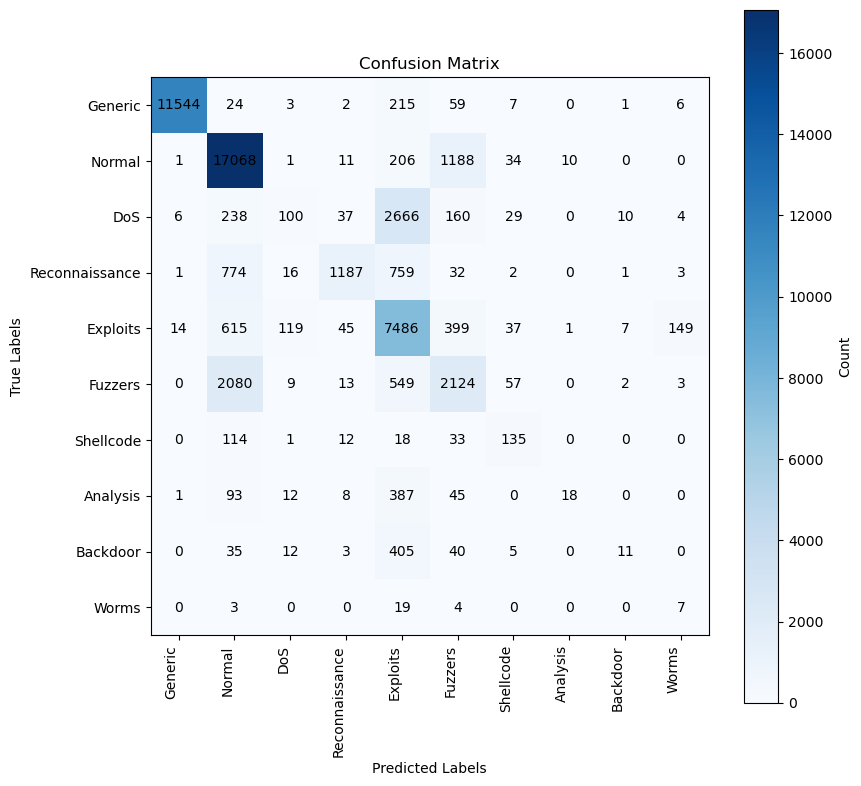

In [999]:
import matplotlib.pyplot as plt

# Define labels for your classes (assuming you know the class names)
class_names = attacks

# Create a heatmap from the confusion matrix
plt.figure(figsize=(9, 9))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.colorbar(label='Count')
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=10)
plt.xticks(range(len(class_names)), class_names, rotation=90, ha='right')
plt.yticks(range(len(class_names)), class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

In [1050]:
model.save('multi_classifier_smotet_adamw.keras')